## Assignment: Example Econometrics Experiment
#### Please read through the notebook and replace any #todos
#### Please also be sure to fill out the markdown cell at the end of this notebook with your response

In [2]:
# As always, we begin by importing our packages at the top of our notebook

import pandas
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Firest model "revenue_model"
#Let's use .tail() to view a sample of our data and make sure it loaded as expected

df = pandas.read_csv('CP3.csv',parse_dates=True,index_col='Ticker')
df
df.tail(4)

,Publish Date,Fiscal Period,Fiscal Year,Report Date,Revenue,"Property, Plant & Equipment, Net",Adjusted Close
Ticker,,,,,,,
DLR,2018-03-01,FY,2017,2017-12-31,2457928000,13666559000,93.5452
DLR,2019-02-25,FY,2018,2018-12-31,3046478000,14894043000,103.0966
DLR,2020-03-02,FY,2019,2019-12-31,3209241000,14230575000,132.4181
DLR,2021-03-01,FY,2020,2020-12-31,3903609000,22263017000,138.7966


In [4]:
# Here we will use the .columns property of our DataFrame to print out the columns from our data.

df.columns

Index(['Publish Date', 'Fiscal Period', 'Fiscal Year', 'Report Date',
       'Revenue', 'Property, Plant & Equipment, Net', 'Adjusted Close'],
      dtype='object')

In [5]:
# Objective:
# Select the following collumns for your data frame:
# 'Revenue','Property, Plant, Net' and 'Adjusted Close'

econ_df = df[['Revenue', 'Property, Plant & Equipment, Net', 'Adjusted Close']]


<AxesSubplot:xlabel='Ticker'>

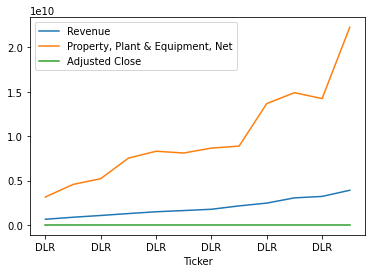

In [6]:
# Let's visualize our data

econ_df.plot()

In [7]:
# We can take a look at our DateTimeIndex from our DataFrame using the .index property.

econ_df.index

Index(['DLR', 'DLR', 'DLR', 'DLR', 'DLR', 'DLR', 'DLR', 'DLR', 'DLR', 'DLR',
       'DLR', 'DLR'],
      dtype='object', name='Ticker')

         Revenue  Property, Plant & Equipment, Net  Adjusted Close
Ticker                                                            
DLR    -1.352509                         -1.315852       -1.159932
DLR    -1.118335                         -1.042692       -0.999371
DLR    -0.915912                         -0.916625       -0.694958
DLR    -0.693948                         -0.469779       -0.745598


<AxesSubplot:xlabel='Ticker'>

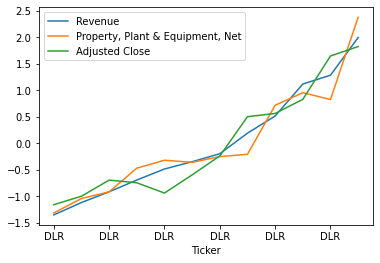

In [8]:
# In the above plot, it was a bit difficult to see relationships 
# in our data due to the differences in scale.
# Let's normalize our data using a Z or Standard transform.

scaler = StandardScaler()

scaled_df = pandas.DataFrame(
    scaler.fit_transform(econ_df), 
    columns=econ_df.columns,
    index=econ_df.index)

print(scaled_df.head(4))

scaled_df.plot()

Much better!

<AxesSubplot:xlabel='Ticker'>

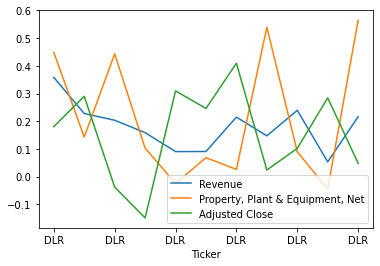

In [9]:
# Objective:
# Visualize an alternative plot using the function "pct_change"

econ_df.pct_change().dropna().plot()

<AxesSubplot:xlabel='Ticker'>

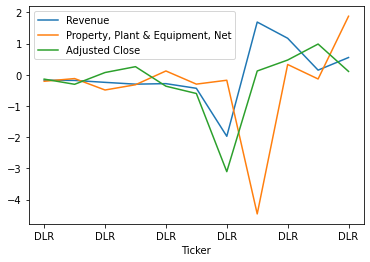

In [10]:
# How does this look with our rescaled data?
scaled_df.pct_change().dropna().plot()

In [11]:
# Here we will make use of the rename method from our DataFrame
# to change some collumn names. We will be making use of a 
# stanrded model syntax borrowed from the programming language R.

# Don't worry if it's new to you. But we can't have spaces in our 
# collumn names

relabeled_df = df.rename(columns={
    'Property, Plant & Equipment, Net':'ppe',
    'Adjusted Close':'adjusted_close',
    'Revenue':'revenue'})

In [12]:
# Let's quickly check our new DataFrame
relabeled_df.tail(3)

,Publish Date,Fiscal Period,Fiscal Year,Report Date,revenue,ppe,adjusted_close
Ticker,,,,,,,
DLR,2019-02-25,FY,2018,2018-12-31,3046478000,14894043000,103.0966
DLR,2020-03-02,FY,2019,2019-12-31,3209241000,14230575000,132.4181
DLR,2021-03-01,FY,2020,2020-12-31,3903609000,22263017000,138.7966


#### Time for some modeling!

The first model is completed for you, work to complete the second one.

In [13]:
# Objective:
# Use the above line of code as a guide, and complete the econometric model for 'revenue'

revenue_model = ols("adjusted_close ~ revenue ", data = relabeled_df).fit()

                            OLS Regression Results                            
Dep. Variable:         adjusted_close   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     160.2
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           1.77e-07
Time:                        16:49:50   Log-Likelihood:                -42.959
No. Observations:                  12   AIC:                             89.92
Df Residuals:                      10   BIC:                             90.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6742      6.152      0.597      0.5

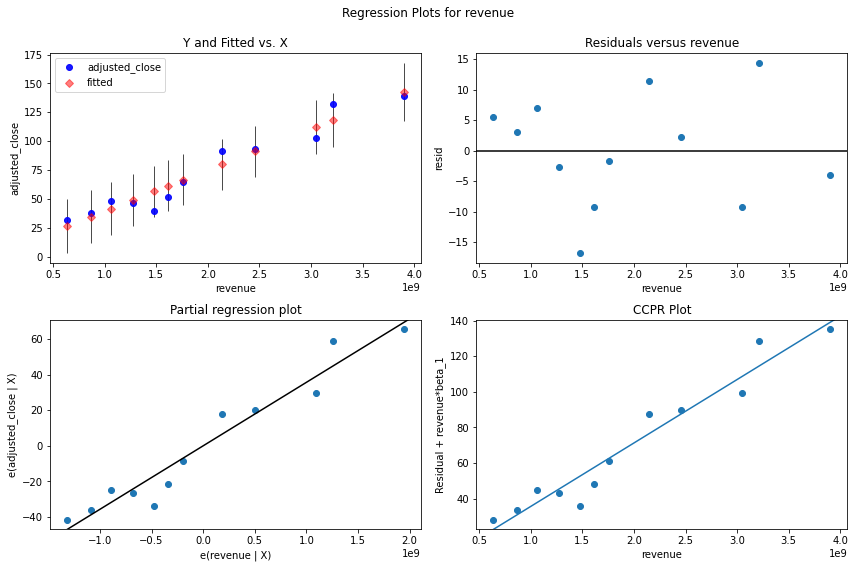

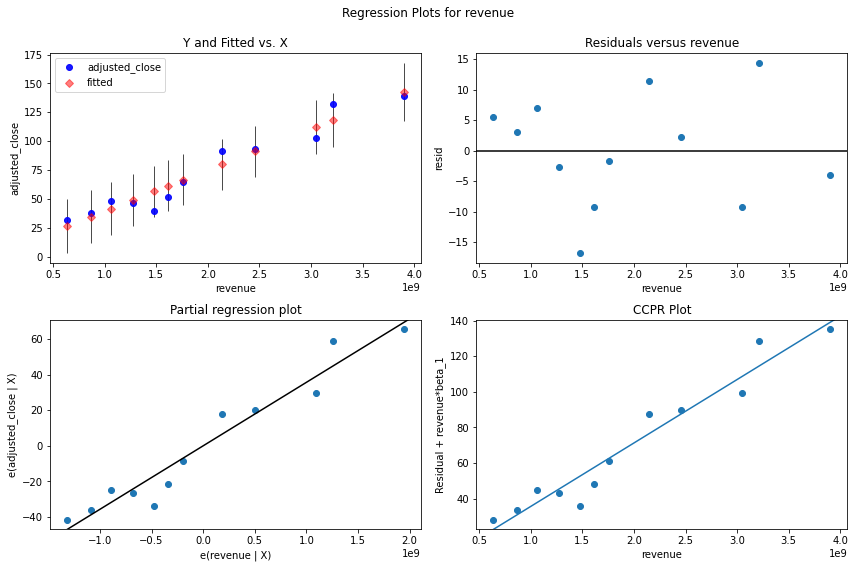

In [14]:
# In one cell we will print our summary and plot some figures below.
# Don't worry about the new package for now. But keep it in mind for the future.

print(revenue_model.summary())
sm.graphics.plot_regress_exog(revenue_model, 'revenue', fig=plt.figure(figsize=(12,8)))

                            OLS Regression Results                            
Dep. Variable:         adjusted_close   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     160.2
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           1.77e-07
Time:                        16:49:52   Log-Likelihood:                -42.959
No. Observations:                  12   AIC:                             89.92
Df Residuals:                      10   BIC:                             90.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6742      6.152      0.597      0.5

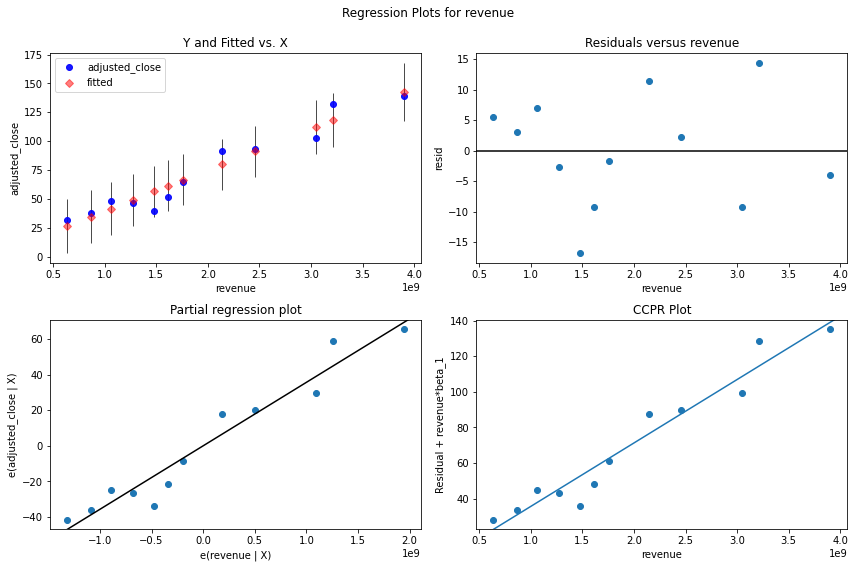

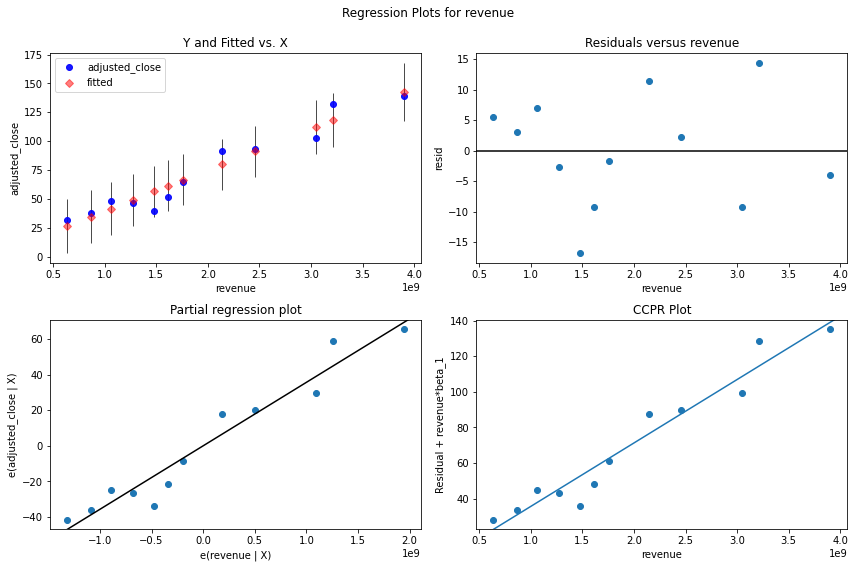

In [15]:
# Again for the next model
print(revenue_model.summary())

sm.graphics.plot_regress_exog(revenue_model, 'revenue', fig=plt.figure(figsize=(12,8)))

In [16]:
#second model "plant_and_property_model."
df = pandas.read_csv('CP3.csv',parse_dates=True,index_col='Ticker')
df
df.tail(4)

,Publish Date,Fiscal Period,Fiscal Year,Report Date,Revenue,"Property, Plant & Equipment, Net",Adjusted Close
Ticker,,,,,,,
DLR,2018-03-01,FY,2017,2017-12-31,2457928000,13666559000,93.5452
DLR,2019-02-25,FY,2018,2018-12-31,3046478000,14894043000,103.0966
DLR,2020-03-02,FY,2019,2019-12-31,3209241000,14230575000,132.4181
DLR,2021-03-01,FY,2020,2020-12-31,3903609000,22263017000,138.7966


In [17]:
df.columns

Index(['Publish Date', 'Fiscal Period', 'Fiscal Year', 'Report Date',
       'Revenue', 'Property, Plant & Equipment, Net', 'Adjusted Close'],
      dtype='object')

In [18]:
econ_df = df[['Revenue', 'Property, Plant & Equipment, Net', 'Adjusted Close']]

<AxesSubplot:xlabel='Ticker'>

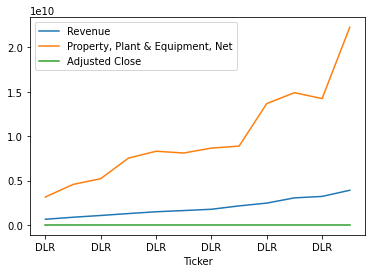

In [19]:
econ_df.plot()

In [20]:
econ_df.index

Index(['DLR', 'DLR', 'DLR', 'DLR', 'DLR', 'DLR', 'DLR', 'DLR', 'DLR', 'DLR',
       'DLR', 'DLR'],
      dtype='object', name='Ticker')

         Revenue  Property, Plant & Equipment, Net  Adjusted Close
Ticker                                                            
DLR    -1.352509                         -1.315852       -1.159932
DLR    -1.118335                         -1.042692       -0.999371
DLR    -0.915912                         -0.916625       -0.694958
DLR    -0.693948                         -0.469779       -0.745598


<AxesSubplot:xlabel='Ticker'>

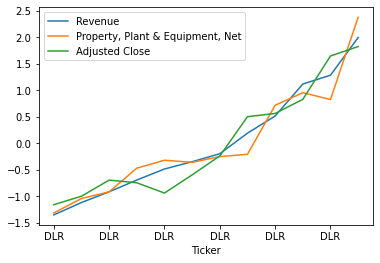

In [21]:
scaler = StandardScaler()

scaled_df = pandas.DataFrame(
    scaler.fit_transform(econ_df), 
    columns=econ_df.columns,
    index=econ_df.index)

print(scaled_df.head(4))

scaled_df.plot()

<AxesSubplot:xlabel='Ticker'>

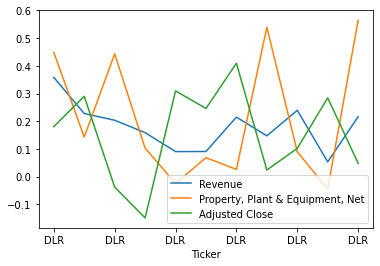

In [22]:
econ_df.pct_change().dropna().plot()

In [23]:
relabeled_df = df.rename(columns={
    'Property, Plant & Equipment, Net':'ppe',
    'Adjusted Close':'adjusted_close',
    'Revenue':'revenue'})

In [24]:
relabeled_df.tail(3)

,Publish Date,Fiscal Period,Fiscal Year,Report Date,revenue,ppe,adjusted_close
Ticker,,,,,,,
DLR,2019-02-25,FY,2018,2018-12-31,3046478000,14894043000,103.0966
DLR,2020-03-02,FY,2019,2019-12-31,3209241000,14230575000,132.4181
DLR,2021-03-01,FY,2020,2020-12-31,3903609000,22263017000,138.7966


In [25]:
plant_and_property_model = ols("adjusted_close ~ ppe ", data = relabeled_df).fit()

                            OLS Regression Results                            
Dep. Variable:         adjusted_close   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     49.28
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           3.63e-05
Time:                        16:50:14   Log-Likelihood:                -49.286
No. Observations:                  12   AIC:                             102.6
Df Residuals:                      10   BIC:                             103.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5303     10.086      1.044      0.3

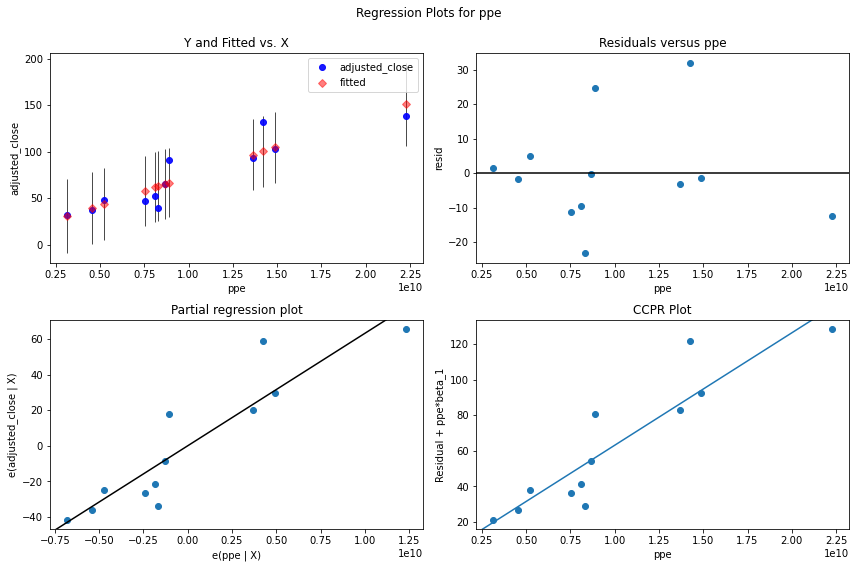

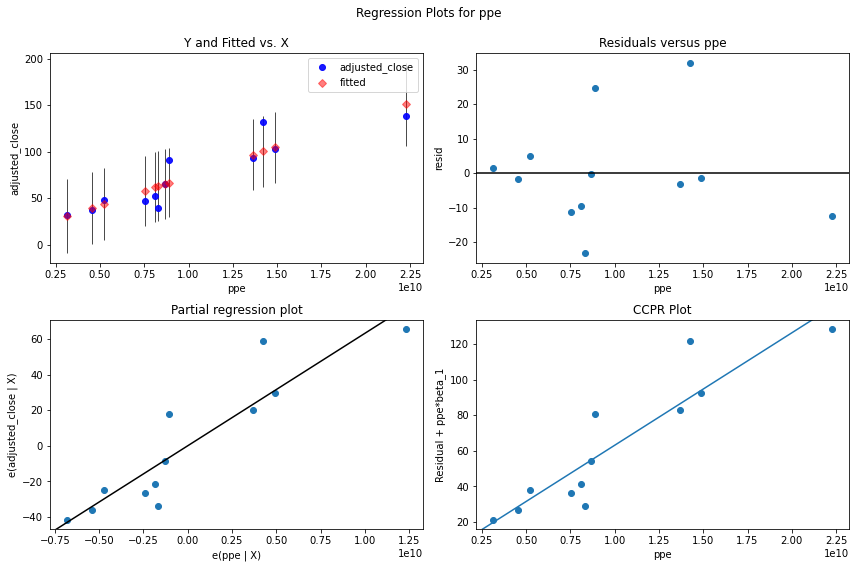

In [26]:
print(plant_and_property_model.summary())
sm.graphics.plot_regress_exog(plant_and_property_model, 'ppe', fig=plt.figure(figsize=(12,8)))

                            OLS Regression Results                            
Dep. Variable:         adjusted_close   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     49.28
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           3.63e-05
Time:                        16:50:18   Log-Likelihood:                -49.286
No. Observations:                  12   AIC:                             102.6
Df Residuals:                      10   BIC:                             103.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5303     10.086      1.044      0.3

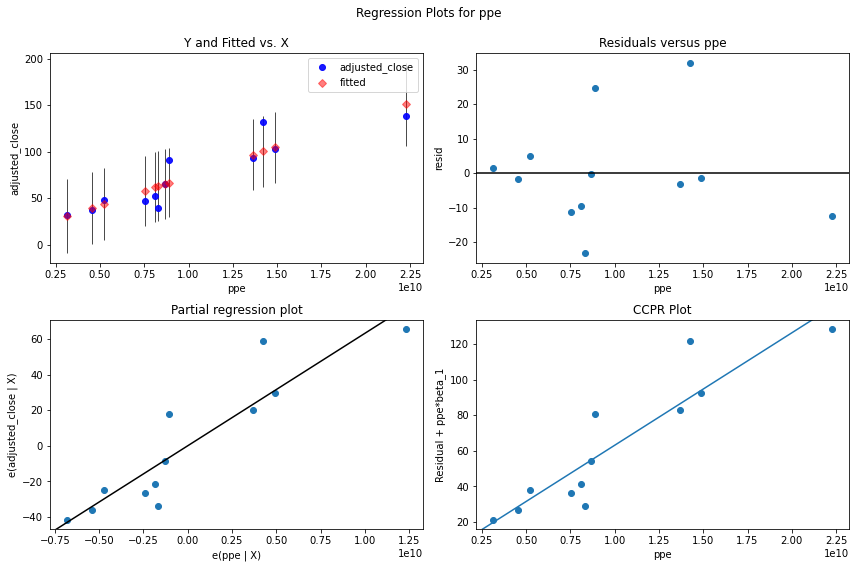

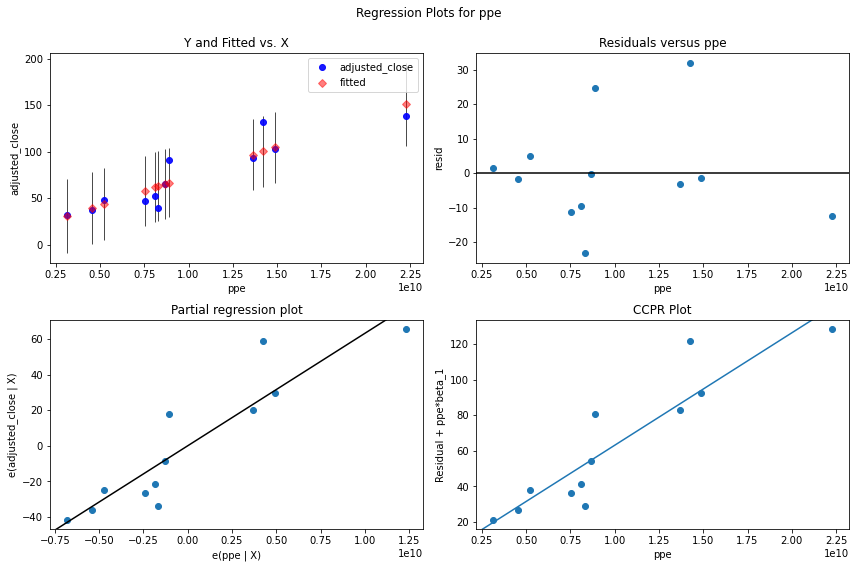

In [27]:
print(plant_and_property_model.summary())

sm.graphics.plot_regress_exog(plant_and_property_model, 'ppe', fig=plt.figure(figsize=(12,8)))

In [29]:
# Final Objective:

# In the markdown cell bellow (double click to edit), 
# write your response for which model you think best explains the Adjusted Close prices
# for Digital Realty Trust. Does the equity in the form of Plant, Property and Equipment (PPE)
# best explain our data, or does Revenue? Why? Please refer to the above analyses and/or figures.
THE ANSWER QUESTION:
R-squared of Revenue 0.941
and  R-squared of Ppe 0.831 
So Revenue is the best

<< Students, please write your response here >>